### Exploration of the resource landscape

I want to explore the forumalation I am using for the resource landscape so that I understand how it works and am confident it is working correctly.

In [3]:
using Distributions;
using Random;
using StatsPlots;
using SharedArrays;

In [4]:
Random.seed!(42);

### Define the negative binomial distribution


A Negative binomial distribution describes the number of failures before the rth success in a sequence of independent Bernoulli trials. 

It is parameterized by :
* the number of successes r
* the probability of success in an individual trial p

mean = pr / (1-p)

variance = pr / (1-p)^2

Facts:

* The mean of the negative binomial distribution is always bigger
    than the variance


In [5]:
neg_bin = NegativeBinomial()

NegativeBinomial{Float64}(r=1.0, p=0.5)

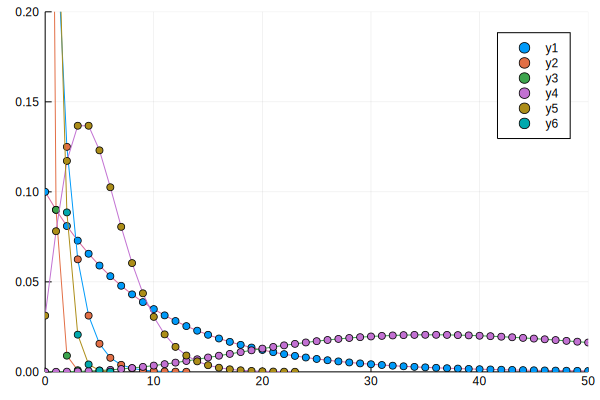

In [6]:
nb1 = NegativeBinomial(1, 0.1)
nb2 = NegativeBinomial(1, 0.5)
nb3 = NegativeBinomial(1, 0.9)
nb4 = NegativeBinomial(5, 0.1)
nb5 = NegativeBinomial(5, 0.5)
nb6 = NegativeBinomial(5, 0.9)

gams = [nb1, nb2, nb3, nb4, nb5, nb6]

plot(gams, yaxis = ("",(0,0.2)), xaxis = ("", (0, 50.0)))

### Define the Gamma distriubtion

The Gamma distribution: 
* shape parameter α > 0
* scale c or θ  > 0

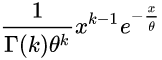

Facts:
* The mean of the Gamma distribution is the mean encounter rate (rate per meter, and not per second, rate per meter means the same thing as density of resources).

Mean = alpha / c                  (1/m)

Variance = alpha / c^2            (

In [7]:
res_list = [[0.2,0.25],[4.0,6.0], [8.0, 10.0], [12.0, 16.0], [16.0,20.0], [20.0,24.0],
            [24.0, 28.0], [100.0, 106.0]];

function get_alpha_c(obs_m, obs_v)
## gamma parameters directly from observed mean and variance
c = obs_m ./ (obs_v .- obs_m); # [float] [g/m2 / (g2/m4 * g/m2) = g/m2 / g3/m6 = m4/g2]
alpha = c .* obs_m;   # [float] [m4/g2 * g/m2 = m2/g]   
    return alpha, c
end

param_array = zeros(Float64, length(res_list),2)
for i=1:length(res_list)
    param_array[i,1], param_array[i,2] = get_alpha_c(res_list[i][1],res_list[i][2])
end

In [8]:
g1=Gamma(param_array[1,1],param_array[1,2])    
g2=Gamma(param_array[2,1],param_array[2,2])    
g3=Gamma(param_array[3,1],param_array[3,2])    
g4=Gamma(param_array[4,1],param_array[4,2])    
g5=Gamma(param_array[5,1],param_array[5,2])    
g6=Gamma(param_array[6,1],param_array[6,2])    
g7=Gamma(param_array[7,1],param_array[7,2])    
g8=Gamma(param_array[8,1],param_array[8,2])


Gamma{Float64}(α=1666.6666666666667, θ=16.666666666666668)

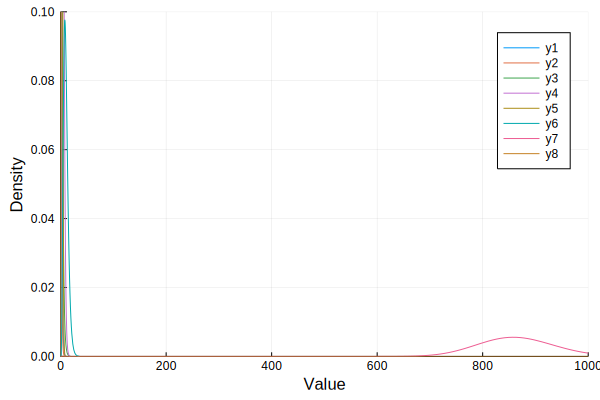

In [19]:
gams = [g1, g2, g3, g4, g5, g6, g7,g8]

plot(gams, yaxis = ("Density", (0,0.1)), xaxis = ("Value", (0, 1000)))

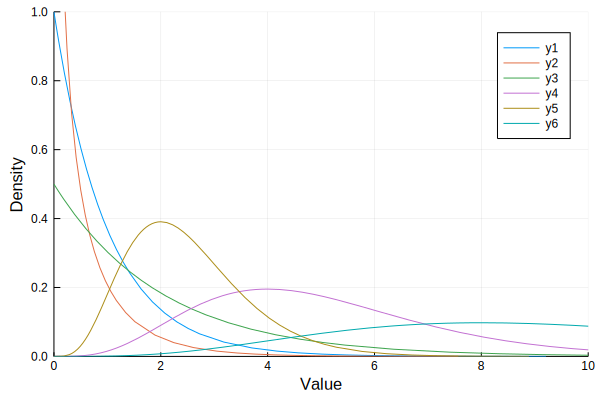

In [10]:
g1 = Gamma(1,1)
g2 = Gamma(0.5 ,1)
g3 = Gamma(1,2)
g4 = Gamma(5,1)
g5 = Gamma(5,0.5)
g6 = Gamma(5,2)

gams = [g1, g2, g3, g4, g5, g6]

plot(gams, yaxis = ("Density", (0,1)), xaxis = ("Value", (0, 10)))

### Connection between distributions

In order to move smoothly from observed resource landscape to probability distributions I need to understand how the parameters connect.

In [11]:
# The oberserved mean and variance should equal the expected mean and variance of the
# negative binomial
obs_m = p*r/(1-p);
obs_v = p*r/(1-p)^2;

UndefVarError: UndefVarError: p not defined

p = (v - m) / v,  
r = -(m^2 / (m - v))

In [12]:
# this is what connects the gamma and the negative bin 
# can't remember where it comes from!!
r = alpha;
p = c / (1+c);

UndefVarError: UndefVarError: c not defined

In [13]:
## gamma parameters directly from observed mean and variance
c = obs_m ./ (obs_v .- obs_m); # [float] [g/m2 / (g2/m4 * g/m2) = g/m2 / g3/m6 = m4/g2]
alpha = c .* obs_m;   # [float] [m4/g2 * g/m2 = m2/g]    

UndefVarError: UndefVarError: obs_v not defined

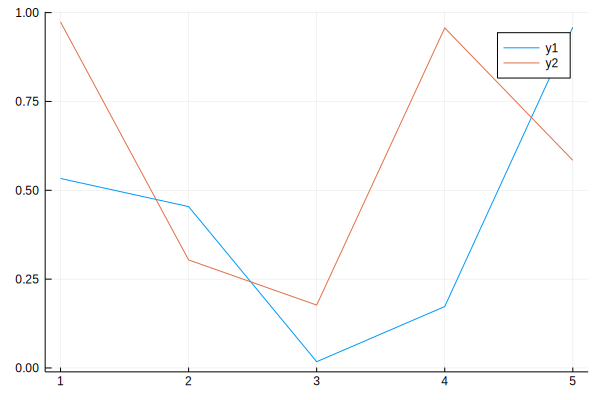

In [14]:
using Plots
data = rand(10,10);
y1 = [data[1:5,1], data[6:10,1]]
plot(y1)